In [2]:
import networkx as nx
from networkx import fast_gnp_random_graph
#from networkx.communities import asyn_fluidc
import matplotlib.pyplot as plt
#import seaborn.apionly as sns
from matplotlib.animation import FuncAnimation
import matplotlib.colors as cm

{0: [0.5846753145673486, 0.2290076495880834], 1: [0.7218497561322836, 0.5327399549618553], 2: [0.8204451725045246, 0.1917614793352539], 3: [0.2004011822632138, 0.44367399281213826], 4: [0.6646532104299433, 0.4338917373852025], 5: [0.7363426467121934, 0.06597784313793553], 6: [0.3908225217362561, 0.5315293654790422], 7: [0.6423321507808876, 0.06687715306659858], 8: [0.17490349033831865, 0.9270629668842587], 9: [0.0016641678229365464, 0.6917781925458563], 10: [0.0450755275804916, 0.8416464135649185], 11: [0.5583656053416564, 0.7234098627326206], 12: [0.5034349520959452, 0.20004503149278985], 13: [0.16094475100698857, 0.2987143909569244], 14: [0.7741782406115161, 0.40626040826390764], 15: [0.2802579337302745, 0.05512174587824692], 16: [0.6708791437792184, 0.9231550818864147], 17: [0.6244365052349313, 0.3109010204740892], 18: [0.6628002395412884, 0.8630920353888193], 19: [0.2777617604313958, 0.34466834946573355], 20: [0.9024775529431717, 0.7286579379743452], 21: [0.1072470393924514, 0.9152

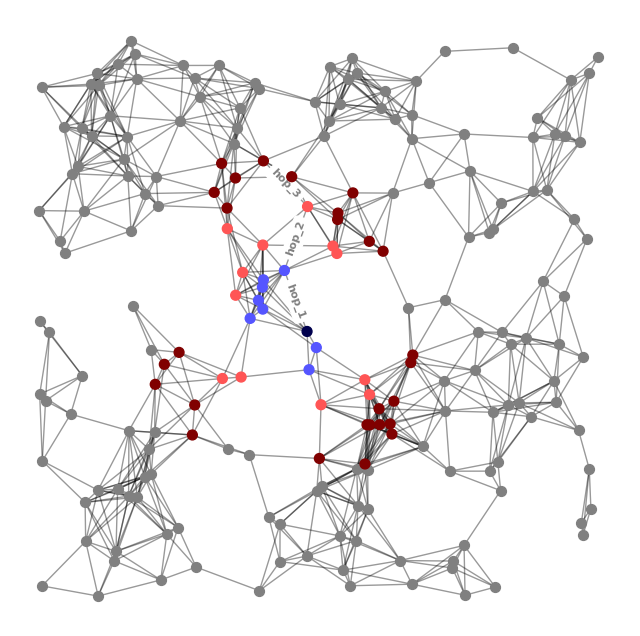

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# Use seed when creating the graph for reproducibility
G = nx.random_geometric_graph(200, 0.125, seed=896803)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, "pos")
print(pos)
# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d
print(ncenter)
# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter, cutoff=3))
#p.update((x, 1-y) for x, y in p.items())
print(p)
plt.figure(figsize=(8, 8))

nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(G, pos=pos, nodelist=set(G.nodes()) - set(p.keys()), node_size=50, node_color="gray")
plt.gca().set_prop_cycle(None)
ncol = list(p.values())
#ncol = list(map(lambda x: 9-x, ncol))
print(ncol)

nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=50,
    node_color=ncol,
    cmap= plt.cm.seismic, #plt.cm.Reds_r,
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={(159,157): 'hop_1', 
                 (157, 97): 'hop_2', 
                 (97, 178): 'hop_3',},
    font_color='k',
    font_size = 8,
    font_weight = 'bold',
    verticalalignment = 'center',
    horizontalalignment = 'center',
    alpha = 0.5

)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
#plt.show()
plt.savefig("hops.png",format='png',dpi=100,bbox_inches='tight')

In [129]:
print(list(G.nodes()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


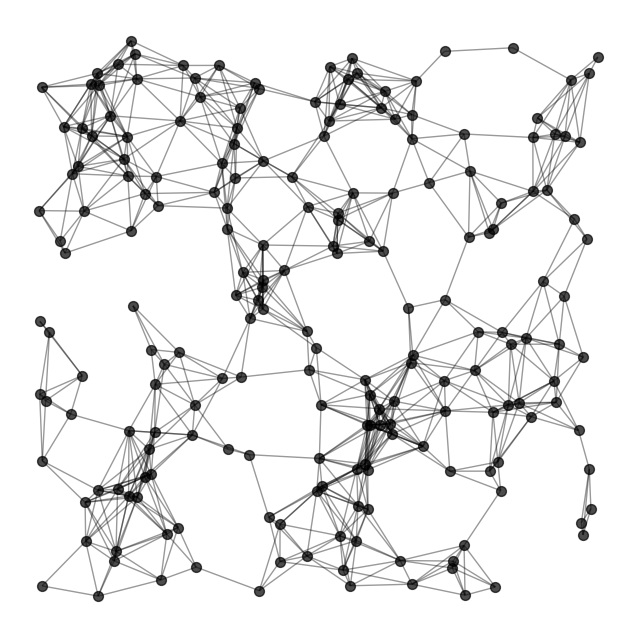

In [12]:
from random import sample
random_node = [ncenter] #sample(list(G.nodes()), 1)

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=G.nodes(),#list(p.keys()),
    node_size=50,
    node_color='k', #list(p.values()),
    alpha=0.7,
    cmap=plt.cm.Reds_r,
)
# nx.draw_networkx_nodes(
#     G,
#     pos,
#     nodelist=random_node,
#     node_size=55,
#     node_color='red', #list(p.values()),
#     cmap=plt.cm.Reds_r,
# )
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
#plt.show()
#print(random_nodes)
plt.savefig("big_graph.png",format='png',dpi=100,bbox_inches='tight')

In [ ]:
root = ncenter
edges_1hop=nx.bfs_edges(G, source=root, depth_limit=2)
nodes_1hop=[root] + [v for u, v in edges_1hop]

/home/alinal/miniconda3/envs/torch/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


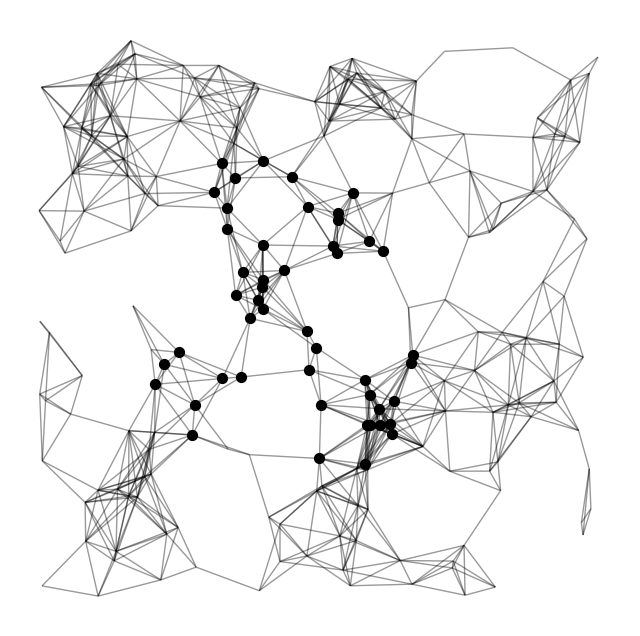

In [4]:
plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=50,
    node_color='k', #list(p.values()),
    cmap=plt.cm.Reds_r,
)
# nx.draw_networkx_nodes(
#     G,
#     pos,
#     nodelist=nodes_1hop,
#     node_size=55,
#     node_color='red', #list(p.values()),
#     cmap=plt.cm.Reds_r,
# )

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()


In [ ]:
print(G)

Graph with 200 nodes and 860 edges


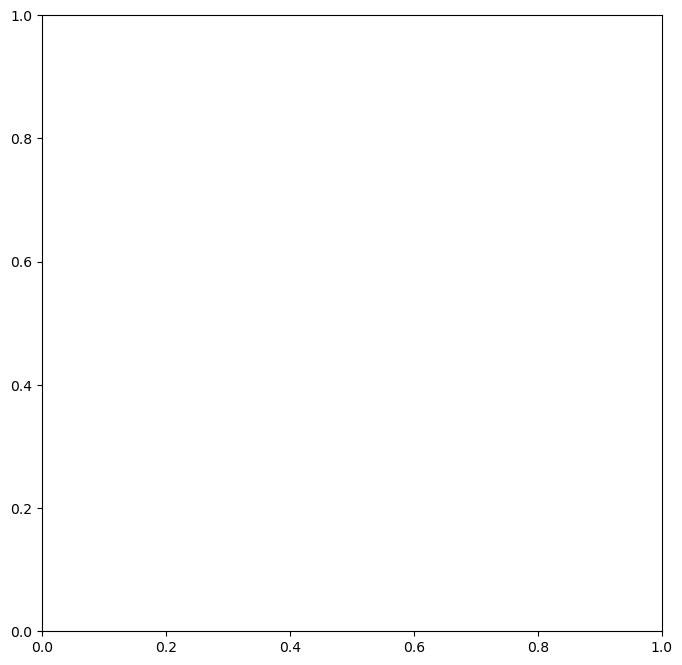

In [ ]:
# Build plot
fig, ax = plt.subplots(figsize=(8,8))

def updateG(num):
    ax.clear()
    nx.draw_networkx_edges(G, pos, alpha=0.2,edge_color="gray")
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=list(p.keys()),
        node_size=50,
        node_color='k', #list(p.values()),
        cmap=plt.cm.Reds_r,
    )
    # Scale plot ax
    ax.set_title("Frame %d:    "%(num+1) +  "hops", fontweight="bold")
    ax.axis("off")
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.xlim(-0.05, 1.05)
    ax.ylim(-0.05, 1.05)
    
    return fig
        
ani = FuncAnimation(fig, updateG, frames=6, interval=200, repeat=True)
plt.show()
ani.save('graph.mp4')

<Figure size 800x800 with 0 Axes>

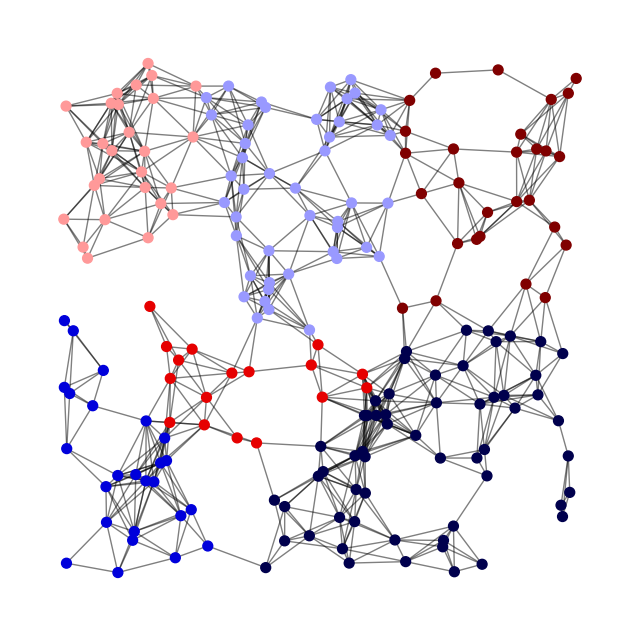

In [137]:
# compute the best partition
partitions = nx.community.asyn_fluidc(G,6)
#fig, ax = plt.subplots(figsize=(8,8))
plt.figure(figsize=(8, 8))
plt.figure(figsize=(8, 8))
cmap = plt.cm.viridis
shapes = 'so^>v<dph8'

# color the nodes according to their partition
#cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_edges(G, pos, alpha=0.5)
i=0
output = {}
for partition in partitions:
    res = dict.fromkeys(partition, i)
    output.update(res)
    i=i+1
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(output.keys()),
    node_size=50,
    node_color=list(output.values()),
    cmap= plt.cm.seismic,) #plt.cm.Reds_r,
plt.axis("off")
plt.savefig("graphPartition.png",format='png',dpi=100,bbox_inches='tight')

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Data(edge_index=[2, 1720], pos=[200, 2])
40
Graph with 69 nodes and 194 edges
Graph with 60 nodes and 161 edges
Graph with 67 nodes and 220 edges
Graph with 67 nodes and 208 edges
Graph with 64 nodes and 192 edges
Graph with 59 nodes and 168 edges
Graph with 73 nodes and 261 edges
Graph with 65 nodes and 171 edges
Graph with 70 nodes and 208 edges
Graph with 65 nodes and 200 edges
Graph with 67 nodes and 196 edges
Graph with 65 nodes and 223 edges
Graph with 57 nodes and 174 edges
Graph with 53 nodes and 164 edges
Graph with 69 nodes and 215 edges
Graph with 57 nodes and 142 edges
Graph with 59 nodes and 155 edges
Graph with 68 nodes and 231 edges
Graph with 58 nodes and 158 edges
Graph with 66 nodes and 163 edges
Graph with 67 nodes and 202 edges
Graph with 62 nodes and 205 edges
Graph with 69 nodes and 163 edges
Graph with 59 nodes and 191 edges
Graph with 67 nodes and 206 edge

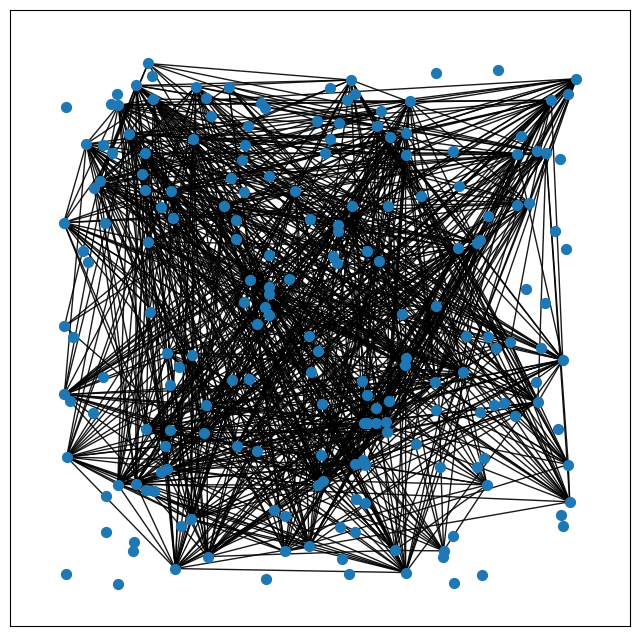

In [ ]:
%matplotlib inline
from torch_geometric.loader import NeighborLoader,ShaDowKHopSampler
from torch_geometric.utils.convert import to_networkx, from_networkx
import torch
import numpy as np
from torch_geometric.datasets import Planetoid
import time
from IPython import display
data = Planetoid('.', name='Cora')[0]
print(data)
pos = nx.get_node_attributes(G, "pos")
pyg_graph = from_networkx(G)
print(pyg_graph)
data = pyg_graph
loader = ShaDowKHopSampler(
    data,
    # Sample 30 neighbors for each node for 2 iterations
    num_neighbors=4,
    # Use a batch size of 128 for sampling training nodes
    batch_size=5,
    #input_nodes=data.x,
    depth=2,
)
print(len(loader))
plt.figure(figsize=(8, 8))
part = next(iter(loader))
GP = to_networkx(part, to_undirected=True)
colors = [cm.to_hex(plt.cm.seismic(i)) for i in range(50)]

cmap=plt.cm.seismic
my_colors = cmap(np.linspace(0, 1, 41))
U = nx.empty_graph(200)
for step,part in enumerate(loader):
    GP = to_networkx(part, to_undirected=True)
    print(GP)
    nodes=GP.number_of_nodes()
    nx.set_node_attributes(GP, step, 'color')
    U = nx.compose(U,GP)
    #nx.draw_networkx_edges(GP, pos=part.pos.numpy(),alpha=0.9, edge_color=my_colors[i])
    #nx.draw_networkx_nodes(GP, pos=part.pos.numpy(), nodelist=set(GP.nodes()),node_size=50,node_color=my_colors[i],alpha=1)
    #plt.show()
    #display.clear_output(wait=True)
    #display.display(plt.gcf())
    #time.sleep(1.0)
print(U.nodes[0]['color']) 
nx.draw_networkx_edges(U, pos=pos,alpha=0.9, edge_color='k')
nx.draw_networkx_nodes(U, pos=pos, nodelist=set(U.nodes()),node_size=50,node_color alpha=1)
plt.show()

Computing METIS partitioning...
Done!


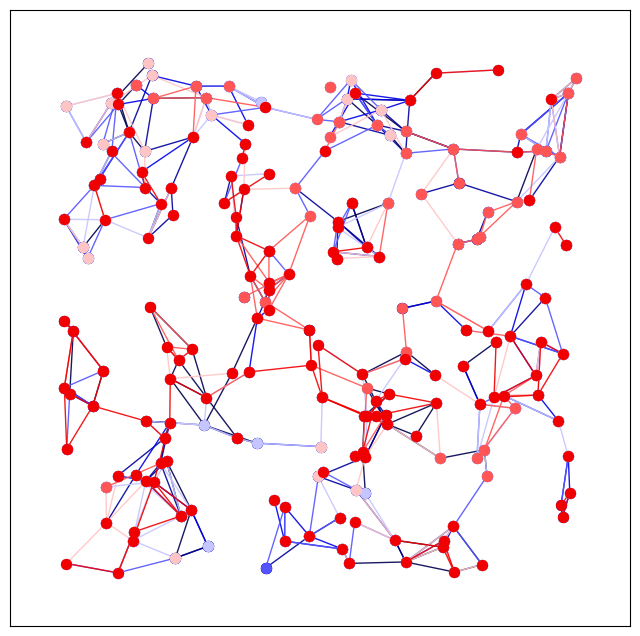

In [ ]:
%matplotlib inline
from torch_geometric.loader import NeighborLoader
from torch_geometric.loader import ClusterData, ClusterLoader
from torch_geometric.utils.convert import to_networkx, from_networkx
import torch
import numpy as np
from torch_geometric.datasets import Planetoid
import time
from IPython import display

#print(G.nodes())
pyg_graph = from_networkx(G)
pyg_graph.x=G.nodes()
#print(pyg_graph)

cluster_data = ClusterData(pyg_graph, num_parts=5)  # 1. Create subgraphs.
train_loader = ClusterLoader(cluster_data, batch_size=2, shuffle=True)  # 2. Stochastic partioning scheme.
plt.figure(figsize=(8, 8))
i=0
cmap=plt.cm.seismic
my_colors = cmap(np.linspace(0, 1, 10))
for part in loader:
    GP = to_networkx(part, to_undirected=True)
    #print(GP)
    nodes=GP.number_of_nodes()
    nx.draw_networkx_edges(GP, pos=part.pos.numpy(),alpha=0.9, edge_color=my_colors[i])
    nx.draw_networkx_nodes(GP, pos=part.pos.numpy(), nodelist=set(GP.nodes()),node_size=50,node_color=my_colors[i],alpha=1)
    i=i+1
    #display.clear_output(wait=True)
    #display.display(plt.gcf())
    #time.sleep(1.0)
    

{134, 135, 136, 8, 10, 9, 140, 139, 142, 21, 155, 28, 33, 37, 43, 46, 48, 178, 179, 180, 55, 58, 189, 64, 67, 70, 71, 83, 86, 88, 91, 99, 106, 107, 108, 109, 113, 118, 124, 127}


TypeError: 'Graph' object does not support item assignment

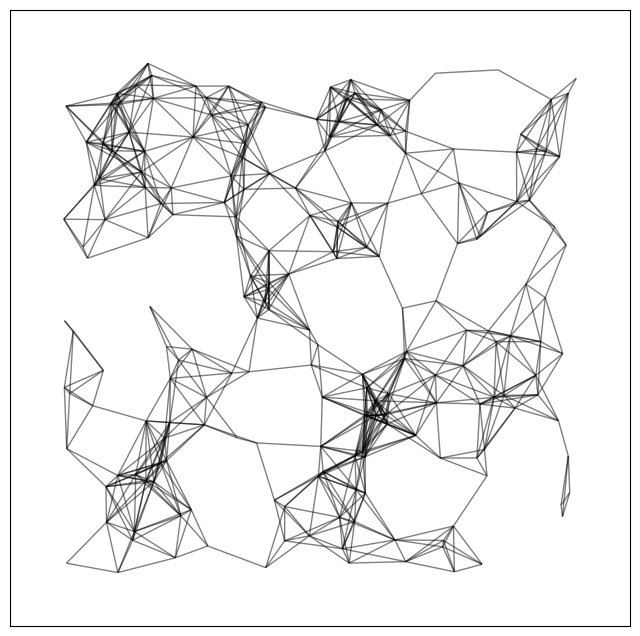

<Figure size 800x800 with 0 Axes>

In [ ]:
# compute the best partition
partitions = nx.community.asyn_fluidc(G,6)
#fig, ax = plt.subplots(figsize=(8,8))
plt.figure(figsize=(8, 8))
cmap = plt.cm.viridis
shapes = 'so^>v<dph8'

# color the nodes according to their partition
#cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_edges(G, pos, alpha=0.5)
i=0
output = {}
for partition in partitions:
    plt.figure(figsize=(8, 8))
    print(partition)
    H = nx.subgraph(G,partition)
    res = dict.fromkeys(partition, i)
    output.update(res)

    i+=1
nx.draw_networkx_nodes(
        H[0],
        pos,
        nodelist=partition,
        node_size=50,
        node_color=list(output.values()),
        cmap= plt.cm.seismic,) #plt.cm.Reds_r,
plt.savefig("graphPartition.png",format='png',dpi=100,bbox_inches='tight')

{0: array([-0.45,  0.95]), 1: array([0.45, 0.95]), 2: array([-0.75,  0.75]), 3: array([-0.35,  0.75]), 4: array([0.35, 0.75]), 6: array([-0.55,  0.55]), 7: array([0.  , 0.55]), 8: array([0.55, 0.55]), 5: array([0.75, 0.75]), 9: array([-0.77, -0.97])}


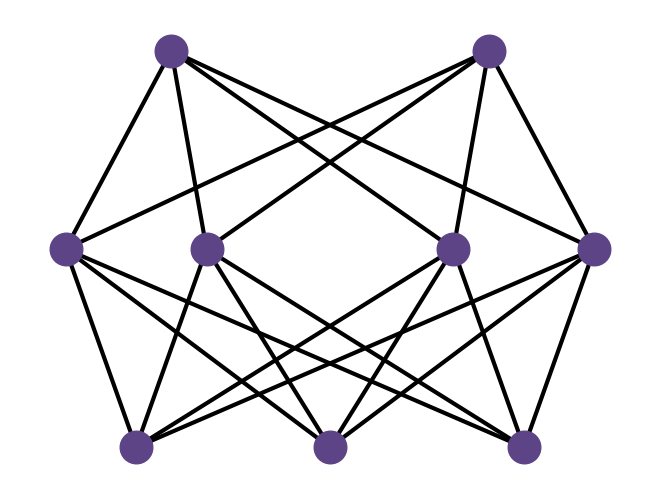

In [229]:
import networkx as nx
import numpy as np
G=nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6,7,8])  # An example graph
#center_node = 5  # Or any other node to be in the center
#edge_nodes = set(G) - {center_node}
# Ensures the nodes around the circle are evenly distributed
#pos = nx.circular_layout(G.subgraph(edge_nodes))
G.add_edge(0, 2)
G.add_edge(0, 3)
G.add_edge(0, 4)
G.add_edge(0, 5)
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(1, 5)
G.add_edge(2, 6)
G.add_edge(2, 7)
G.add_edge(2, 8)
G.add_edge(3, 6)
G.add_edge(3, 7)
G.add_edge(3, 8)
G.add_edge(4, 6)
G.add_edge(4, 7)
G.add_edge(4, 8)
G.add_edge(5, 6)
G.add_edge(5, 7)
G.add_edge(5, 8)
pos[0] = np.array([-0.45, 0.95])  # manually specify node position
pos[1] = np.array([0.45, 0.95])
pos[2] = np.array([-0.75, 0.75])  # manually specify node position
pos[3] = np.array([-0.35,  0.75])
pos[4] = np.array([0.35,  0.75])  # manually specify node position
pos[5] = np.array([0.75,  0.75])
pos[6] = np.array([-0.55,  0.55])  # manually specify node position
pos[7] = np.array([0,  0.55])
pos[8] = np.array([0.55,  0.55])  # manually specify node position


print(pos)
nx.draw(G, pos, with_labels=False, node_size=550, node_color='#5D4486', edge_color='k', width=3)
plt.axis("off")
plt.savefig("model.png",format='png',dpi=100,bbox_inches='tight')

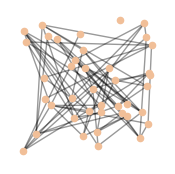

In [41]:
from random import randrange
#G = nx.random_geometric_graph(35, 0.2)
red_palette = ["#c8102e", "#08415c", "#2e2e2e","#6b818c","#f1bf98"]

n = 40  # 10 nodes
m = 70  # 20 edges
#seed = 20160  # seed random number generators for reproducibility

# Use seed for reproducibility
for i in range(0,1):
    G = nx.gnm_random_graph(n, m)
    colorQW = randrange(5)
    # position is stored as node attribute data for random_geometric_graph
    pos = nx.random_layout(G)
    plt.figure(figsize=(2, 2))

    nx.draw_networkx_edges(G, pos, alpha=0.4)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=G.nodes(), node_size=20, node_color="#f1bf98")#red_palette[colorQW])
    plt.axis("off")
    plt.savefig("graph"+str(i)+".png",format='png',dpi=100,bbox_inches='tight')